In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


from scipy.stats import norm

from keras.models import Sequential
from keras.losses import MSE
from keras.optimizers import SGD
from keras.layers import Dense, Activation


import tensorflow as tf

Using TensorFlow backend.


In [22]:
def create_normal_points(size=50, loc=30, scale=20):
    inputs = np.arange(size)
    outputs = np.array([norm(loc=loc, scale=scale).pdf(x) for x in inputs])
    return inputs, outputs

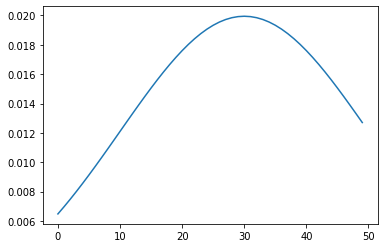

In [23]:
inputs, outputs = create_normal_points()
plt.plot(inputs, outputs)
plt.show()

In [24]:
def compose_net_input(X, in_size=1, out_size=1, stride=1):
    inputs = []
    outputs = []
    for i in range((len(X) - in_size - out_size) // stride + 1):
        inputs.append(X[i * stride : i * stride + in_size])
        outputs.append(X[i * stride + in_size : i * stride + in_size + out_size])
    return np.array(inputs), np.array(outputs)

In [35]:
X, y = compose_net_input(outputs, in_size=2)
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (48, 2)
y shape:  (48, 1)


In [39]:
polynomial = PolynomialFeatures(degree=3)
X = polynomial.fit_transform(X)
print('X shape: ', X.shape)

X shape:  (48, 84)


In [37]:
# Review dataset
print(pd.DataFrame(np.concatenate((X, y), axis=1)))

      0         1         2         3         4         5         6
0   1.0  0.006476  0.006972  0.000042  0.000045  0.000049  0.007486
1   1.0  0.006972  0.007486  0.000049  0.000052  0.000056  0.008019
2   1.0  0.007486  0.008019  0.000056  0.000060  0.000064  0.008568
3   1.0  0.008019  0.008568  0.000064  0.000069  0.000073  0.009132
4   1.0  0.008568  0.009132  0.000073  0.000078  0.000083  0.009709
5   1.0  0.009132  0.009709  0.000083  0.000089  0.000094  0.010297
6   1.0  0.009709  0.010297  0.000094  0.000100  0.000106  0.010893
7   1.0  0.010297  0.010893  0.000106  0.000112  0.000119  0.011494
8   1.0  0.010893  0.011494  0.000119  0.000125  0.000132  0.012099
9   1.0  0.011494  0.012099  0.000132  0.000139  0.000146  0.012703
10  1.0  0.012099  0.012703  0.000146  0.000154  0.000161  0.013304
11  1.0  0.012703  0.013304  0.000161  0.000169  0.000177  0.013899
12  1.0  0.013304  0.013899  0.000177  0.000185  0.000193  0.014485
13  1.0  0.013899  0.014485  0.000193  0.000201 

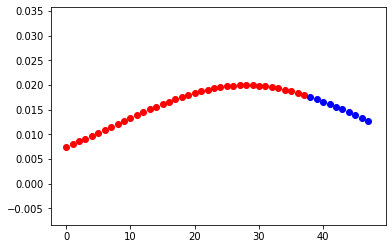

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
plt.scatter(np.arange(len(y_train)), y_train[:, 0], color='red')
plt.scatter(np.arange(len(y_train), len(y_train) + len(y_test)), y_test[:, 0], color='blue')

plt.show()

In [9]:
# Don't use the next cell
# if you use this cell
model = LinearRegression()

In [10]:
# model = Sequential ((
#     Dense(10, input_shape=(5,)),
#     Activation('relu'),II
#     Dense(10, input_shape=(10,)),
#     Activation('relu'),
#     Dense(1, input_sIIpe=(10,)),
#     Activation('relu')
# ))



# model.compile(
#     optimizer=SGD(lr=0.01),
#     loss=MSE
# )

Accuracy on the train set:  1.0
Accuracy on the test set:  0.9999999999772811


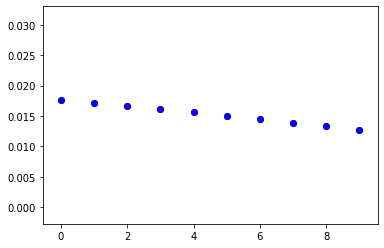

In [41]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('Accuracy on the train set: ', model.score(X_train, y_train))
print('Accuracy on the test set: ', model.score(X_test, y_test))


plt.scatter(np.arange(len(y_test)), y_pred[:, 0], color='red')
plt.scatter(np.arange(len(y_test)), y_test[:, 0], color='blue')
plt.show()

In [12]:
print(pd.DataFrame.from_dict({
        'y_pred': y_pred[:, 0],
        'y_test': y_test[:, 0]
}))

     y_pred    y_test
0  0.079885  0.079788
1  0.078912  0.078209
2  0.076322  0.073654
3  0.073463  0.066645
4  0.070911  0.057938


In [13]:
print(X_test[:, 0].shape)
print(y_pred[:, 0].shape)

(5,)
(5,)


In [14]:
?Dense